In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

In [37]:
dataset = pd.read_csv('spam.csv' , encoding='latin-1')

In [38]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [39]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [40]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , inplace=True)

In [41]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
dataset['v1'] = dataset['v1'].map({'ham':0 , 'spam':1})

In [43]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

In [45]:
dataset['length']=dataset['v2'].apply(len)
dataset.head()

,v1,v2,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


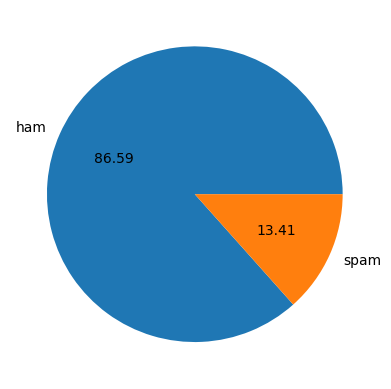

In [46]:
import matplotlib.pyplot as plt
plt.pie(dataset['v1'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

<Axes: ylabel='count'>

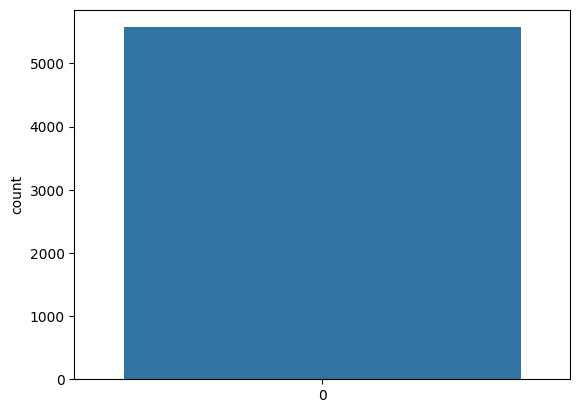

In [47]:
sns.countplot(dataset['v1'])

In [48]:
import nltk
!pip install nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
dataset['num_words'] = dataset['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
dataset['num_sentences'] = dataset['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

<Axes: xlabel='length', ylabel='Count'>

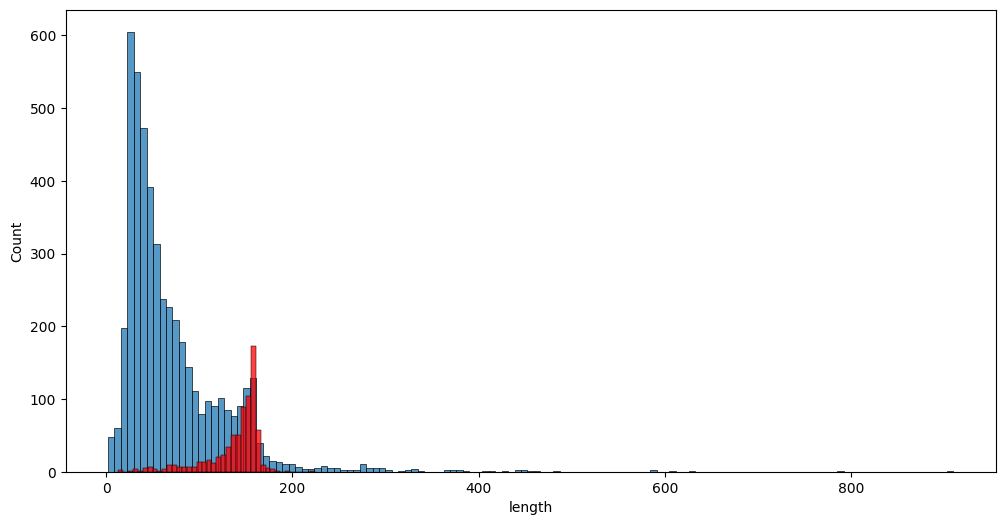

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['v1'] == 0]['length'])
sns.histplot(dataset[dataset['v1'] == 1]['length'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

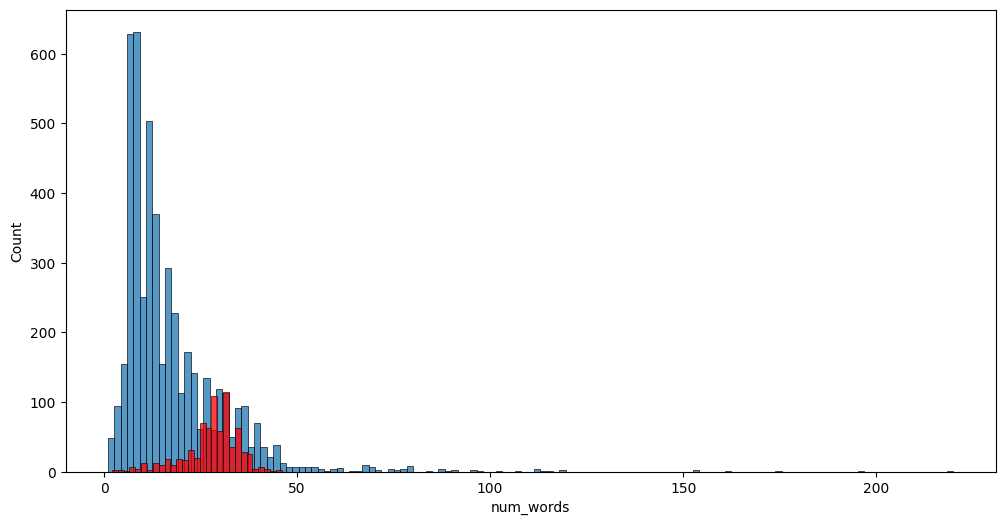

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['v1'] == 0]['num_words'])
sns.histplot(dataset[dataset['v1'] == 1]['num_words'],color='red')

<ipython-input-53-9d3fd451b567>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

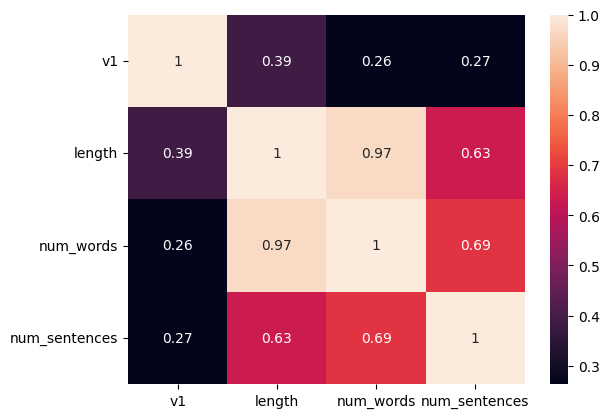

In [53]:
sns.heatmap(dataset.corr(),annot=True)

In [54]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [56]:
corpus = []

In [57]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [58]:
for i in range(0 , len(dataset)):
  message = re.sub('[^a-zA-Z]' , ' ' , dataset['v2'][i])
  message = message.lower()
  message = message.split()
  ss = SnowballStemmer(language='english')
  message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
  message = ' '.join(message)
  corpus.append(message)

In [59]:
corpus[2]

'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli'

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[: , 0].values

In [61]:
X.shape

(5572, 6216)

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 0)

In [64]:
x_train.shape

(4457, 6216)

In [65]:
x_test.shape

(1115, 6216)

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
classifier1 = MultinomialNB()
classifier1.fit(x_train , y_train)
nb_predictions = classifier1.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)

Multinomial Naive Bayes Accuracy: 0.9802690582959641


In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC()
classifier.fit(x_train, y_train)
svm_predictions = classifier.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9748878923766816


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
rf_predictions = classifier.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9766816143497757


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
lr_predictions = classifier.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9775784753363229


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
knn_predictions = classifier.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.9103139013452914


In [71]:
y_pred = classifier1.predict(x_test)

In [72]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<Axes: >

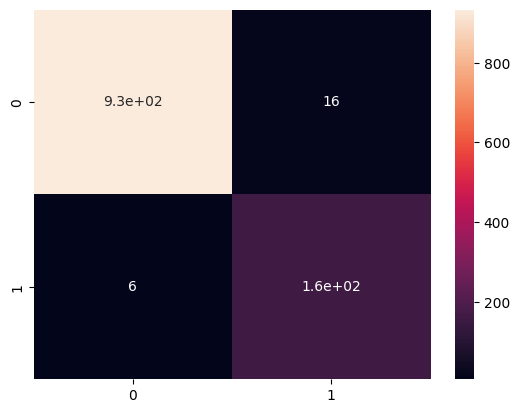

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [74]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))

0.9090909090909091
0.963855421686747


In [75]:
txt = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [76]:
txt = np.array([txt])

In [77]:
txt = cv.transform(txt)

In [78]:
classifier1.predict(txt)

array([1])

In [79]:
import pickle

In [80]:
pickle.dump(classifier1 , open('model.pkl' , 'wb'))

In [81]:
pickle.dump(cv , open('vector.pkl' , 'wb'))